# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

###### Students

* Team: `36`
* Students: `Muller Christophe, Bernard-Michel Martial, Coullery Ludovic, Faraut Victor`
* Dataset: `Free music archive`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [1]:
import numpy as np

In [2]:
adjacency = np.load('../Milestone_1/adjacency.npy')
n_nodes = np.size(adjacency,1) # the number of nodes in the network
n_edges = sum(sum(adjacency!=0))/2 # number of edges in the network

In [3]:
print('Our original graph has:', n_nodes, 'nodes and', n_edges, 'edges.')

Our original graph has: 985 nodes and 174602.0 edges.


## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [4]:
%matplotlib inline

import random

import pandas as pd
import matplotlib.pyplot as plt
import scipy

### Show Adjacency original

Text(0.5, 1.05, 'Original Adjacency')

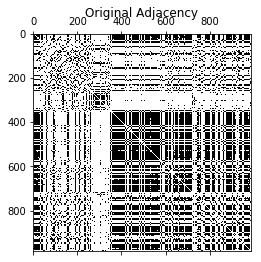

In [5]:
plt.spy(adjacency)
plt.title('Original Adjacency')

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [6]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    random.seed(seed)
    
    adjacency = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            if random.random()<p:
                adjacency[i][j]=1
                
    adjacency = adjacency + adjacency.transpose()
    
    
    return adjacency

Text(0.5, 1.05, 'Erdos-Renyi (5, 0.6)')

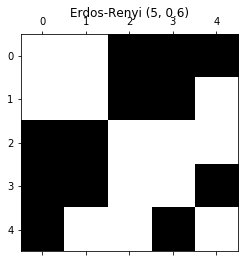

In [7]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5, 1.05, 'Erdos-Renyi (10, 0.4)')

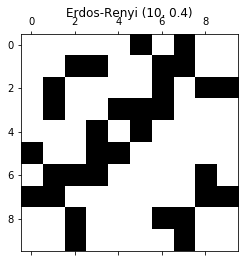

In [8]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

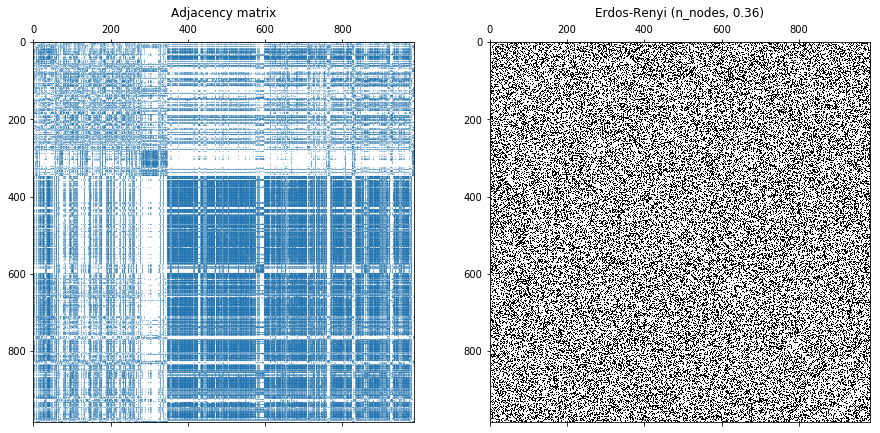

In [9]:
er_graph = erdos_renyi(n_nodes, 0.36)
edges_er = sum(sum(er_graph))/2

plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.spy(adjacency, markersize=0.08)
plt.title('Adjacency matrix')

plt.subplot(122)
plt.spy(er_graph)
plt.title('Erdos-Renyi (n_nodes, 0.36)')

plt.show()

In [10]:
print('Edges of Erdos-Renyi graph:', edges_er)

Edges of Erdos-Renyi graph: 173767.0


Using the same number of nodes (985) as in our original graph we simply calculated the probability of having an edge from `n_edges / (n_nodes*(n_nodes-1) / 2)`, with 174602 edges this gives us a 36% probability.
From these parameters we draw our Erdos-Renyi graph and it indeed has a number of edges very close to our initial graph.

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [11]:
sum(sum(adjacency))

297762.1296215933

In [12]:
def barabasi_albert(n, m, m0=2, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    m0: int (optional)
        Number of nodes for the inital connected network.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    # Your code here.
    
    # initialization of the graph
    random.seed(seed)
    adjacency = np.zeros((n, n))
    adjacency[:m0, :m0] = 1
    np.fill_diagonal(adjacency, 0) #remettre à la fin plutôt?
    
    
    for i in range(m0,n):
        
        attributed_nodes = 0
        pval = sum(adjacency)/sum(sum(adjacency))
        pval = pval[range(0,i)]
        while attributed_nodes < m:
            chosen_index = np.random.choice(np.arange(0, i), p=pval)
            adjacency[i,chosen_index] = 1
            adjacency[chosen_index,i] = 1
            
            attributed_nodes = sum(adjacency[i])
            
    #adjacency[:m0, :m0] = 0
    
    return adjacency

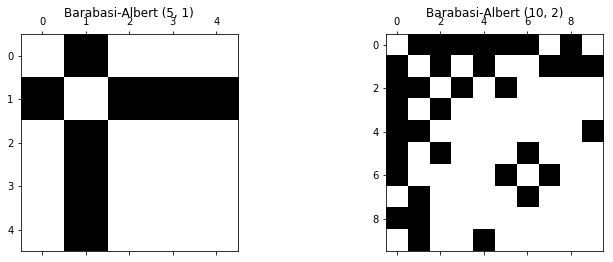

In [13]:
ba1 = barabasi_albert(5, 1, 2, 9087)
ba2 = barabasi_albert(10, 2, 3, 8708)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.spy(ba1)
plt.title('Barabasi-Albert (5, 1)')
plt.subplot(122)
plt.spy(ba2)
plt.title('Barabasi-Albert (10, 2)')
plt.show()

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

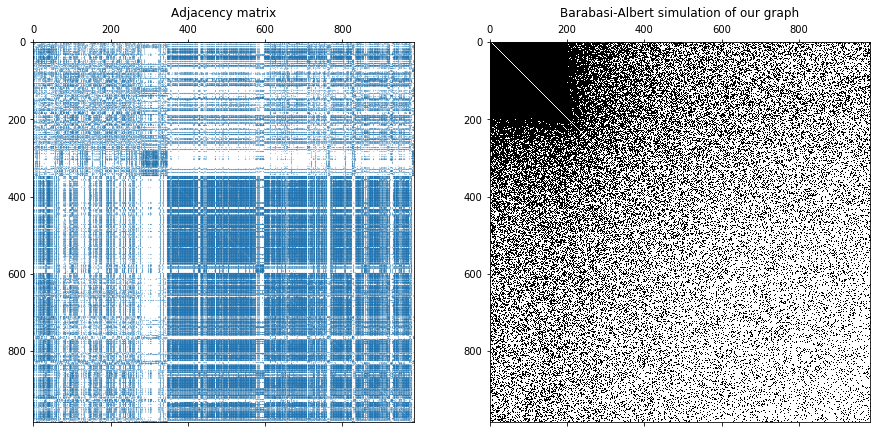

In [14]:
ba_graph = barabasi_albert(n_nodes, 197, 200)

edges_ba = sum(sum(ba_graph != 0))/2

plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.spy(adjacency, markersize=0.08)
plt.title('Adjacency matrix')

plt.subplot(122)
plt.spy(ba_graph)
plt.title('Barabasi-Albert simulation of our graph')

plt.show()

In [15]:
print('Edges of Barabasi-Albert graph:', edges_ba)

Edges of Barabasi-Albert graph: 174545.0


**Your answer here**

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [16]:
print('Edges in:\nOriginal network:',n_edges,
      '\nErdös-Rényi network:',edges_er,
      '\nBarabási-Albert network:',edges_ba)

Edges in:
Original network: 174602.0 
Erdös-Rényi network: 173767.0 
Barabási-Albert network: 174545.0


### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [17]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """

    kl = sum(p*np.log(p/q))

    return kl

In [18]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
kl_divergence(p_test, q_test)

0.09151622184943575

### Question 7: 

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence.

**Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

**Hint:** Make sure none of the graphs have disconnected nodes, as KL divergence will not be defined in that case. If that happens with one of the randomly generated networks, you can regenerate it and keep the seed that gives you no disconnected nodes.

Firstly we compute the degree distributions and normalize them.

In [19]:
#normalization of the degree distribution for all graphs
degree = sum(adjacency != 0)
degree_norm = degree/(2*n_edges)
degree_er = sum(er_graph)
degree_er_norm = degree_er/sum(sum(er_graph))
degree_ba = sum(ba_graph)
degree_ba_norm = degree_ba/sum(sum(ba_graph))

Then we go back to milestone 1 and reuse our function to check for graph connectivity:

In [20]:
#Using the same function used in Milestone 1 for connectivity:
def connected_graph(adjacency):
    def matrix_to_list(matrix):
        adj_list = {}
        for i, node in enumerate(matrix):
            connected_nodes = []
            for neighbour_id, neighbour_w in enumerate(node):
                if neighbour_w >0:
                    connected_nodes.append(neighbour_id)
            adj_list[i] = connected_nodes
        return adj_list

    adjacency_list = matrix_to_list(adjacency)
    
    visited = set()
    visited.add(0)
    import collections
    #collections is a faster queue than a list
    queue = collections.deque([0])
    
    while queue:
        node = queue.popleft()
        for neighbour in adjacency_list[node]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)
        
    return (len(adjacency)==len(visited))

In [21]:
print(connected_graph(adjacency),connected_graph(er_graph),connected_graph(ba_graph))

True True True


Since everything is connected (at least on this run) we can compare the degree distributions:

In [22]:
kl_er = kl_divergence(degree_norm, degree_er_norm)
kl_ba = kl_divergence(degree_norm, degree_ba_norm)

In [23]:
print('\nBetween Erdos-Renyi and initial graph:', kl_er, '\n\nand compared to the Barabasi-Albert graph:', kl_ba)


Between Erdos-Renyi and initial graph: 0.17815728484387033 

and compared to the Barabasi-Albert graph: 0.3296801359611202


The smallest degree divergence is found for the ER graph, anyway the results are pretty poor for both distributions.

### Question 8

Plot the degree distribution histograms for all three networks. Are they consistent with the KL divergence results? Explain.

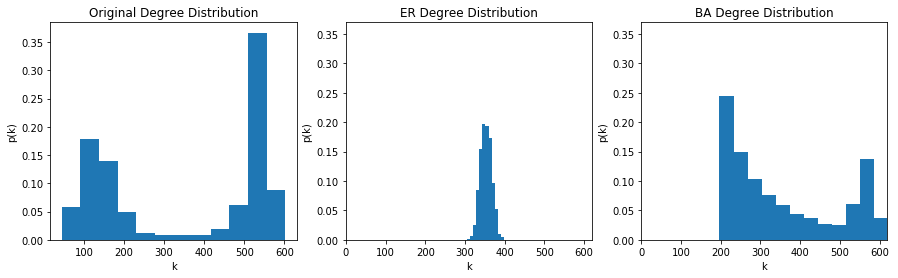

In [24]:
plt.figure(figsize=(15,4))
plt.subplot(131)
weights = np.ones_like(degree) / float(n_nodes)
plt.hist(degree, weights=weights, bins=12)
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('Original Degree Distribution')

plt.subplot(132)
weights = np.ones_like(degree_er) / float(n_nodes)
plt.hist(degree_er, weights=weights, bins=12)
plt.xlabel('k')
plt.ylabel('p(k)')
plt.xlim(0,620)
plt.ylim(0,0.37)
plt.title('ER Degree Distribution')

plt.subplot(133)
weights = np.ones_like(degree_ba) / float(n_nodes)
plt.hist(degree_ba, weights=weights, bins=12)
plt.xlabel('k')
plt.ylabel('p(k)')
plt.xlim(0,620)
plt.ylim(0,0.37)
plt.title('BA Degree Distribution')
plt.show()

The three distributions don't look alike at all. Our graph has two peaks in degree distribution, this is most likely linked to the size of the several music genres we chose. 

The Erdos-Renyi distribution has -logically- a uniform and gaussian-looking degree distribution since the probability of creating a new link is fixed by definition. 

In the Barabasi-Albert degree distribution we have a clear peak around 200 which is the size of our initial fully connected graph but more importantly the amount of links we give to each new node. Then as we add more and more nodes (785) the components of the initial graph grow more and more connected to form the peak around 550.

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

Obviously not, having the same degree distribution does not imply that we have the same number of nodes or links, the graph could even have the same degree distribution and be separated in several big components.

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

In [25]:
import networkx as nx
import math
import collections

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

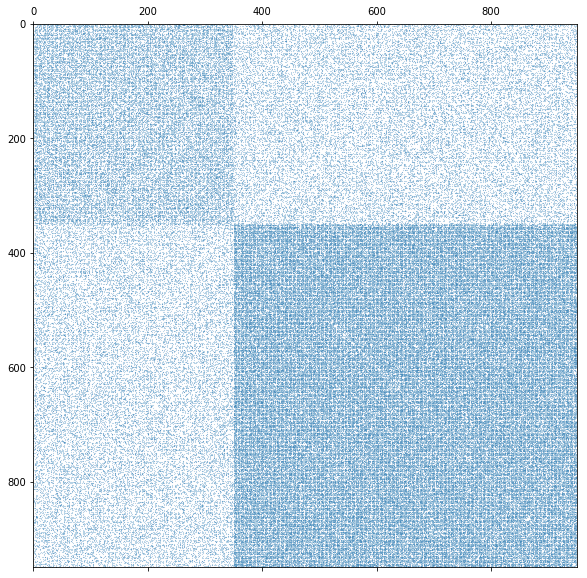

In [39]:
constructor=[(350,50000,0.35),(600,125000,0.7)]
G = nx.random_shell_graph(constructor)
plt.figure(figsize=(10, 10))
plt.spy(nx.adjacency_matrix(G), markersize = 0.08)
#nx.draw(G,pos=nx.spring_layout(G))

This network is not directly in the lectures. But all the random network in the lecture wont fit your network directly.

This network is a random network. It creates random network in shell separately and combine them after to creat a single network. 

### Question 11

Explain (in short) how the chosen model works.

The random shell graph consists of one graph composed of a given number of random graphs (shells). It then creates edges randomly between the shells depending on the given ratio of the constructor. (E.g. if the ratio is set at 0.3, 30% of the edges for the given shell will be between nodes in the shell and 70% will be between nodes of two concecutive shells)

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

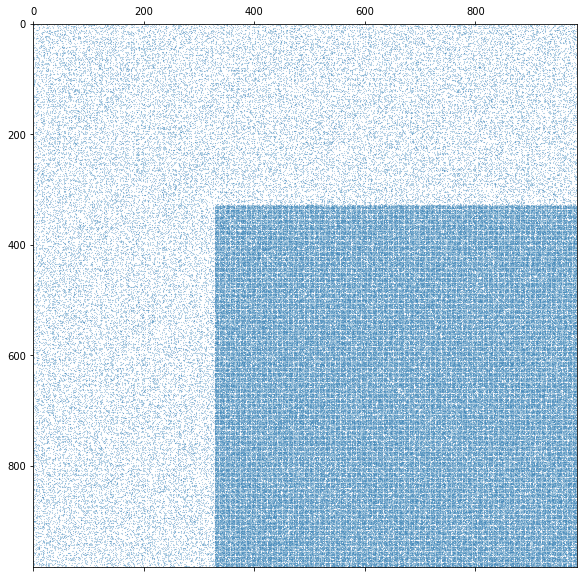

In [40]:
ratio = 1/3
constructor=[(int(np.floor(n_nodes*ratio)),30000,0.2),(int(np.floor(n_nodes*(1-ratio))),145000,0.9)]
G = nx.random_shell_graph(constructor)
plt.figure(figsize=(10, 10))
plt.spy(nx.adjacency_matrix(G), markersize = 0.08)

Here we choose to have a better fitting of the degree ditribution instead of the adjacency graph itself. If we want to have more or less the same adjacency as the original graph. `constructor=[(int(np.floor(n_nodes*ratio)),50000,0.35),(int(np.floor(n_nodes*(1-ratio))),125000,0.7)]`

### Question 13

Check the properties you expected to be similar, and compare to your network.

Text(0.5, 1.0, 'Shell graph Degree Distribution')

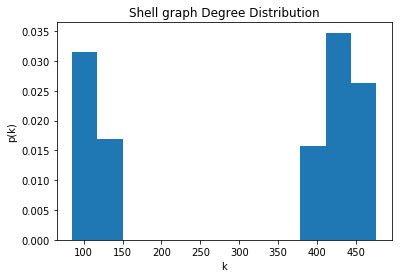

In [38]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
degree_shell, cnt = zip(*degreeCount.items())

weights = np.ones_like(degree_shell) / float(600+350)

plt.hist(degree_shell, weights = weights, bins=12)
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('Shell graph Degree Distribution')

Are the results what you expected? Explain.

**Your answer here.**